In [1]:
'''This code uses an ANN to predict outcomes of AFL matches in 2018 based on player data from 2012-2017.'''
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime

In [2]:
afl = pd.read_csv('C:/Users/the_n/OneDrive/Documents/Coding/stats.csv')
afl = afl.dropna(axis=0)
afl = afl[afl['WinLoss'] != 'D']
afl['D.O.B'] = pd.to_datetime(afl['D.O.B'])
afl['Date'] = pd.to_datetime(afl['Date'])

In [3]:
age_in_days = (afl['Date']-afl['D.O.B'])
age_in_years = age_in_days.dt.days/365.2425
afl['Age'] = age_in_years

In [4]:
afl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63228 entries, 0 to 63711
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Team                    63228 non-null  object        
 1   Player                  63228 non-null  object        
 2   D.O.B                   63228 non-null  datetime64[ns]
 3   Height                  63228 non-null  int64         
 4   Weight                  63228 non-null  int64         
 5   Position                63228 non-null  object        
 6   Season                  63228 non-null  int64         
 7   Round                   63228 non-null  object        
 8   Date                    63228 non-null  datetime64[ns]
 9   Score                   63228 non-null  float64       
 10  Margin                  63228 non-null  float64       
 11  WinLoss                 63228 non-null  object        
 12  Opposition              63228 non-null  object

In [5]:
grouped_data = afl.groupby(['Team','Season','Round','WinLoss','Opposition','Venue'])['Player'].apply(list).reset_index()
grouped_data = grouped_data.to_numpy()
grouped_data[0:10]

array([['Adelaide', 2012, 'PF', 'L', 'Hawthorn', 'M.C.G.',
        list(['Callinan, Ian', 'Dangerfield, Patrick', 'Doughty, Michael', 'Douglas, Richard', 'Henderson, Ricky', 'Jacobs, Sam', 'Johncock, Graham', 'Mackay, David', 'Otten, Andy', 'Petrenko, Jared', 'Porplyzia, Jason', 'Reilly, Brent', 'Rutten, Ben', 'Sloane, Rory', 'Smith, Brodie', 'Thompson, Luke', 'Thompson, Scott', 'Tippett, Kurt', 'Vince, Bernie', 'Walker, Taylor', 'Wright, Matthew', 'van Berlo, Nathan'])],
       ['Adelaide', 2012, 'QF', 'L', 'Sydney', 'Football Park',
        list(['Callinan, Ian', 'Dangerfield, Patrick', 'Doughty, Michael', 'Douglas, Richard', 'Jacobs, Sam', 'Johncock, Graham', 'Mackay, David', 'Petrenko, Jared', 'Porplyzia, Jason', 'Reilly, Brent', 'Riley, Aidan', 'Rutten, Ben', 'Shaw, Sam', 'Sloane, Rory', 'Smith, Brodie', 'Talia, Daniel', 'Thompson, Scott', 'Tippett, Kurt', 'Vince, Bernie', 'Walker, Taylor', 'Wright, Matthew', 'van Berlo, Nathan'])],
       ['Adelaide', 2012, 'R1', 'W', 'Gold Coast

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct1 = ColumnTransformer([('encoder',OneHotEncoder(),[3,4,5])], remainder='passthrough',sparse_threshold=0)
grouped_data = ct1.fit_transform(grouped_data)
grouped_data[0:10]

array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 'Adelaide', 2012, 'PF',
        list(['Callinan, Ian', 'Dangerfield, Patrick', 'Doughty, Michael', 'Douglas, Richard', 'Henderson, Ricky', 'Jacobs, Sam', 'Johncock, Graham', 'Mackay, David', 'Otten, Andy', 'Petrenko, Jared', 'Porplyzia, Jason', 'Reilly, Brent', 'Rutten, Ben', 'Sloane, Rory', 'Smith, Brodie', 'Thompson, Luke', 'Thompson, Scott', 'Tippett, Kurt', 'Vince, Bernie', 'Walker, Taylor', 'Wright, Matthew', 'van Berlo, Nathan'])],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 'Adelaide', 2012, 'QF',
        list(['Callinan, Ian', 'Dangerfield, Patri

In [7]:
training = [x for x in grouped_data if x[43]<2018]
test = [x for x in grouped_data if x[43]==2018]

In [8]:
training

[array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 'Adelaide', 2012, 'PF',
        list(['Callinan, Ian', 'Dangerfield, Patrick', 'Doughty, Michael', 'Douglas, Richard', 'Henderson, Ricky', 'Jacobs, Sam', 'Johncock, Graham', 'Mackay, David', 'Otten, Andy', 'Petrenko, Jared', 'Porplyzia, Jason', 'Reilly, Brent', 'Rutten, Ben', 'Sloane, Rory', 'Smith, Brodie', 'Thompson, Luke', 'Thompson, Scott', 'Tippett, Kurt', 'Vince, Bernie', 'Walker, Taylor', 'Wright, Matthew', 'van Berlo, Nathan'])],
       dtype=object),
 array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 'Adelaide', 2012, 'QF',
        list(['Callinan, Ian

In [9]:
y_train = np.array([x[0] for x in training])
y_test = np.array([x[0] for x in test])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [10]:
# player_stats is each players' average stats between 2012 and 2017.
player_stats = afl[afl['Season'] < 2018].groupby('Player',sort=False).mean()
player_stats = player_stats.reset_index()
player_stats = player_stats.drop(['Height','Weight','Season','BrownlowVotes','Score','Margin'],axis=1)
player_stats = player_stats.to_numpy()

# Player average stats for 2018
player_stats_2018 = afl[afl['Season'] == 2018].groupby('Player',sort=False).mean()
player_stats_2018 = player_stats_2018.reset_index()
player_stats_2018 = player_stats_2018.drop(['Height','Weight','Season','BrownlowVotes','Score','Margin'],axis=1)
player_stats_2018 = player_stats_2018.to_numpy()

In [11]:
pd.set_option('display.max_columns', None)
player_stats[0:3]

array([['Atkins, Rory', 19.910714285714285, 11.053571428571429,
        4.357142857142857, 8.857142857142858, 0.4642857142857143,
        0.35714285714285715, 0.10714285714285714, 1.8928571428571428,
        1.8392857142857142, 3.482142857142857, 1.8392857142857142,
        2.607142857142857, 0.4107142857142857, 0.75, 6.142857142857143,
        13.982142857142858, 0.30357142857142855, 0.3392857142857143,
        1.2321428571428572, 0.7678571428571429, 0.625, 78.32142857142857,
        22.247987882805838],
       ['Betts, Eddie', 13.045112781954888, 8.481203007518797,
        3.1203007518796992, 4.56390977443609, 2.398496240601504,
        1.1804511278195489, 0.0, 3.210526315789474, 0.20300751879699247,
        1.9849624060150375, 1.3609022556390977, 1.9924812030075187,
        0.9548872180451128, 0.7744360902255639, 6.7293233082706765,
        6.082706766917293, 0.5413533834586466, 1.849624060150376,
        1.0225563909774436, 0.3082706766917293, 1.1278195488721805,
        86.9849624

In [12]:
len(player_stats)

1145

In [13]:
# Include opposition and venue in features
opp_teams_train = np.array([x[2:42] for x in training])
opp_teams_test = np.array([x[2:42] for x in test])
# opp_teams_train = opp_teams_train.reshape(-1,1)
# opp_teams_train = ct.fit_transform(opp_teams_train)

# opp_teams_test = test_grouped['Opposition'].values
# opp_teams_test = opp_teams_test.reshape(-1,1)
# opp_teams_test = ct.fit_transform(opp_teams_test)

# venue_train = training_grouped['Venue'].values
# venue_train = venue_train.reshape(-1,1)
# venue_train = ct.fit_transform(venue_train)

# venue_test = test_grouped['Venue'].values
# venue_test = venue_test.reshape(-1,1)
# venue_test = ct.fit_transform(venue_test)

In [14]:
opp_teams_train[0:10]

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [15]:
X_train = [0]*len(training)
for i in range(0,len(training)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats)):
        if player_stats[j][0] in training[i][-1]:
            player_list.append(player_stats[j][1:])
    X_train[i] = player_list
    
X_train = [np.concatenate(x) for x in X_train]

In [16]:
X_train[0:3]

[array([20.346774193548388, 12.725806451612904, 3.4919354838709675,
        7.620967741935484, 0.6693548387096774, 0.5645161290322581,
        0.06451612903225806, 3.870967741935484, 1.314516129032258,
        4.306451612903226, 3.661290322580645, 2.4274193548387095, 1.0,
        0.9435483870967742, 8.435483870967742, 11.85483870967742,
        0.22580645161290322, 0.5161290322580645, 1.3951612903225807,
        0.532258064516129, 0.7661290322580645, 81.44354838709677,
        27.993200275468777, 14.18978102189781, 8.021897810218977,
        3.7664233576642334, 6.1678832116788325, 0.2846715328467153,
        0.24817518248175183, 33.91970802919708, 2.065693430656934,
        1.0656934306569343, 1.9562043795620438, 2.335766423357664,
        1.8832116788321167, 0.8905109489051095, 0.7956204379562044,
        6.189781021897811, 7.956204379562044, 0.9124087591240876,
        0.27007299270072993, 2.627737226277372, 0.021897810218978103,
        0.3722627737226277, 85.94890510948905, 26.6949

In [17]:
X_test = [0]*len(test)
for i in range(0,len(test)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats_2018)):
        if player_stats_2018[j][0] in test[i][-1]:
            player_list.append(player_stats_2018[j][1:])
    X_test[i] = player_list
    
X_test = [np.concatenate(x) for x in X_test]

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [19]:
len(X_test)

408

In [20]:
scaled_X_train = np.hstack((scaled_X_train, opp_teams_train))
scaled_X_test = np.hstack((scaled_X_test, opp_teams_test))

In [21]:
scaled_X_train = np.asarray(scaled_X_train).astype(np.float32)
scaled_X_test = np.asarray(scaled_X_test).astype(np.float32)

In [22]:
print(scaled_X_train[0:3])
print(y_train[0:3])

[[ 0.61880934  1.2108698  -0.6627103  ...  0.          0.
   0.        ]
 [ 0.61880934  1.2108698  -0.6627103  ...  0.          0.
   0.        ]
 [ 0.61880934  1.2108698  -0.6627103  ...  0.          0.
   0.        ]]
[[1.]
 [1.]
 [0.]]


In [23]:
# Build the ANN
ann = tf.keras.models.Sequential()
# First layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
# Second layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
# Output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
#ann.add(tf.keras.layers.Activation('softmax'))

In [24]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
steps = []
accs = []
test_accs = []

for i in range(0, 25):
    ann.fit(scaled_X_train, y_train, epochs = 1)
    [loss, accuracy] = ann.evaluate(scaled_X_train, y_train)
    [loss_t, accuracy_t] = ann.evaluate(scaled_X_test, y_test)
    accs.append(accuracy), steps.append(i), test_accs.append(accuracy_t)

Train on 2466 samples
408/408 [==============================] - 0s 27us/sample - loss: 0.6741 - accuracy: 0.5711
Train on 2466 samples
408/408 [==============================] - 0s 27us/sample - loss: 0.6536 - accuracy: 0.5980
Train on 2466 samples
408/408 [==============================] - 0s 27us/sample - loss: 0.6413 - accuracy: 0.6127
Train on 2466 samples
408/408 [==============================] - 0s 27us/sample - loss: 0.6327 - accuracy: 0.6078
Train on 2466 samples
408/408 [==============================] - 0s 22us/sample - loss: 0.6259 - accuracy: 0.6225
Train on 2466 samples
408/408 [==============================] - 0s 27us/sample - loss: 0.6258 - accuracy: 0.6275
Train on 2466 samples
408/408 [==============================] - 0s 27us/sample - loss: 0.6198 - accuracy: 0.6397
Train on 2466 samples
408/408 [==============================] - 0s 29us/sample - loss: 0.6246 - accuracy: 0.6397
Train on 2466 samples
408/408 [==============================] - 0s 27us/sample - loss: 

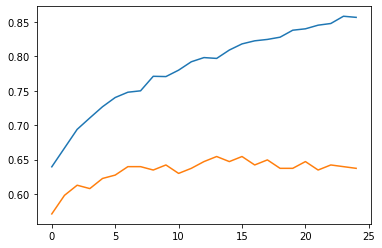

In [26]:
import matplotlib.pyplot as plt
plt.plot(steps, accs)
plt.plot(steps, test_accs)

In [27]:
y_pred = ann.predict(scaled_X_test)

In [28]:
y_pred

array([[0.9454584 ],
       [0.2937052 ],
       [0.10196032],
       [0.19705158],
       [0.9671705 ],
       [0.5844714 ],
       [0.9485236 ],
       [0.5139027 ],
       [0.1259313 ],
       [0.26552445],
       [0.17790884],
       [0.12084361],
       [0.11324087],
       [0.1320549 ],
       [0.10909616],
       [0.11414883],
       [0.2948459 ],
       [0.23668434],
       [0.14062235],
       [0.30481005],
       [0.10758823],
       [0.35030717],
       [0.9963243 ],
       [0.97543323],
       [0.96204364],
       [0.7982849 ],
       [0.2062535 ],
       [0.47927848],
       [0.17100999],
       [0.96513647],
       [0.8661414 ],
       [0.7013135 ],
       [0.58802825],
       [0.7315762 ],
       [0.64827025],
       [0.41907093],
       [0.8047427 ],
       [0.5272365 ],
       [0.66819113],
       [0.9743156 ],
       [0.9548104 ],
       [0.32710156],
       [0.9559556 ],
       [0.972839  ],
       [0.97385603],
       [0.9876204 ],
       [0.9621766 ],
       [0.969

In [29]:
y_pred1 = [1 if x>=0.5 else 0 for x in y_pred]

In [30]:
y_pred1

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

0.6372549019607843
